<a href="https://colab.research.google.com/github/Crisosth/IA/blob/main/KNN-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
dados = pd.read_csv("drug200.csv")
dados.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
labelencoder = LabelEncoder()
dados = dados.apply(labelencoder.fit_transform)
dados.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,8,0,0,0,167,0
1,30,1,1,0,89,3
2,30,1,1,0,43,3
3,12,0,2,0,10,4
4,44,0,1,0,133,0


In [ ]:
X = dados[[ 'Age','BP','Na_to_K']]
Y = dados[['Drug']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True,test_size=0.1, random_state=0 )

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2
           4       0.71      0.83      0.77         6

    accuracy                           0.85        20
   macro avg       0.74      0.77      0.75        20
weighted avg       0.81      0.85      0.83        20



<ipython-input-8-df72eb9ed3b9>:8: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="Drug", y="Age",


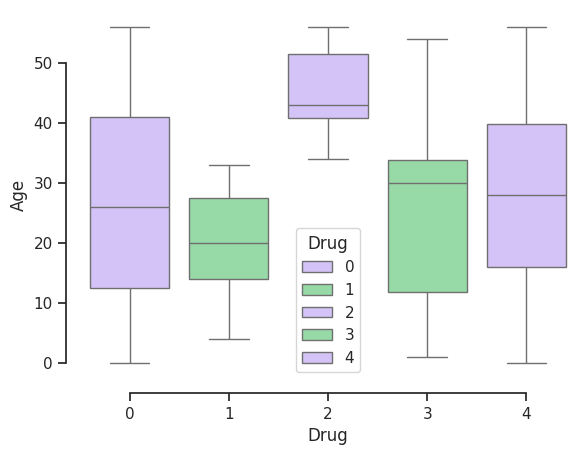

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# lendo o dataset
tips = dados

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Drug", y="Age",
            hue="Drug", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

In [ ]:
X = dados[[ 'Age','BP','Na_to_K', 'Cholesterol']]